In [4]:
import torch

In [5]:
torch.version.__version__


'1.10.2+cu102'

In [6]:
torch.cuda.is_available()

True

In [7]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


### Import datasets - Hugginface library

In [8]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [9]:
from datasets import list_datasets

In [10]:
all_datasets = list_datasets()

In [11]:
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 8638 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


### Let's load emotion dataset

In [12]:
from datasets import load_dataset

In [13]:
emotions = load_dataset('emotion')

Using custom data configuration default
Reusing dataset emotion (/home/dawidkubicki/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


In [14]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [15]:
train_ds = emotions["train"]

In [16]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [17]:
len(train_ds)

16000

In [18]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [19]:
train_ds.column_names

['text', 'label']

In [20]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}

### From datasets to DataFrames

In [21]:
import pandas as pd

In [22]:
emotions.set_format(type="pandas")

In [23]:
df = emotions["train"][:]

In [24]:
def label2str(row):
    return emotions["train"].features['label'].int2str(row)

In [25]:
df["label name"] = df["label"].apply(label2str)

In [26]:
df.head()

,text,label,label name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Looking at the Class Distribution

In [27]:
import matplotlib.pyplot as plt

In [28]:
# df['label name'].value_counts(ascending=True).plot().barh()
# plt.title("Frequency of classes")

### How long are the Tweets?

In [29]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)

In [30]:
df["Words Per Tweet"]

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: Words Per Tweet, Length: 16000, dtype: int64

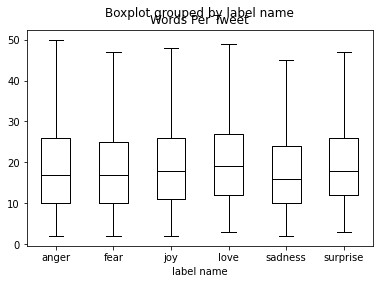

In [31]:
df.boxplot("Words Per Tweet", by="label name", grid=False, showfliers=False, color="black")
plt.show()

### Character Tokenization

In [32]:
text = "This is a sample text for Transformer neural network"

In [33]:
tokenized_text = list(text)
print(tokenized_text)

['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', ' ', 's', 'a', 'm', 'p', 'l', 'e', ' ', 't', 'e', 'x', 't', ' ', 'f', 'o', 'r', ' ', 'T', 'r', 'a', 'n', 's', 'f', 'o', 'r', 'm', 'e', 'r', ' ', 'n', 'e', 'u', 'r', 'a', 'l', ' ', 'n', 'e', 't', 'w', 'o', 'r', 'k']


#### Make a token2idx dictionary

In [34]:
#{key: value for (key, value) in iterable} <-> Dict comprehension
token2idx = {char: idx for (char, idx) in enumerate(sorted(tokenized_text))}

In [35]:
token2idx

{0: ' ',
 1: ' ',
 2: ' ',
 3: ' ',
 4: ' ',
 5: ' ',
 6: ' ',
 7: ' ',
 8: 'T',
 9: 'T',
 10: 'a',
 11: 'a',
 12: 'a',
 13: 'a',
 14: 'e',
 15: 'e',
 16: 'e',
 17: 'e',
 18: 'e',
 19: 'f',
 20: 'f',
 21: 'h',
 22: 'i',
 23: 'i',
 24: 'k',
 25: 'l',
 26: 'l',
 27: 'm',
 28: 'm',
 29: 'n',
 30: 'n',
 31: 'n',
 32: 'o',
 33: 'o',
 34: 'o',
 35: 'p',
 36: 'r',
 37: 'r',
 38: 'r',
 39: 'r',
 40: 'r',
 41: 'r',
 42: 's',
 43: 's',
 44: 's',
 45: 's',
 46: 't',
 47: 't',
 48: 't',
 49: 'u',
 50: 'w',
 51: 'x'}

In [36]:
token2idx

{0: ' ',
 1: ' ',
 2: ' ',
 3: ' ',
 4: ' ',
 5: ' ',
 6: ' ',
 7: ' ',
 8: 'T',
 9: 'T',
 10: 'a',
 11: 'a',
 12: 'a',
 13: 'a',
 14: 'e',
 15: 'e',
 16: 'e',
 17: 'e',
 18: 'e',
 19: 'f',
 20: 'f',
 21: 'h',
 22: 'i',
 23: 'i',
 24: 'k',
 25: 'l',
 26: 'l',
 27: 'm',
 28: 'm',
 29: 'n',
 30: 'n',
 31: 'n',
 32: 'o',
 33: 'o',
 34: 'o',
 35: 'p',
 36: 'r',
 37: 'r',
 38: 'r',
 39: 'r',
 40: 'r',
 41: 'r',
 42: 's',
 43: 's',
 44: 's',
 45: 's',
 46: 't',
 47: 't',
 48: 't',
 49: 'u',
 50: 'w',
 51: 'x'}

In [37]:
token2idx = {char: idx for (idx, char) in enumerate(sorted(set(tokenized_text)))}

In [38]:
token2idx

{' ': 0,
 'T': 1,
 'a': 2,
 'e': 3,
 'f': 4,
 'h': 5,
 'i': 6,
 'k': 7,
 'l': 8,
 'm': 9,
 'n': 10,
 'o': 11,
 'p': 12,
 'r': 13,
 's': 14,
 't': 15,
 'u': 16,
 'w': 17,
 'x': 18}

#### Make a list of indexes to the tokenized_text

In [39]:
input_ids = [token2idx[char] for char in tokenized_text]

In [40]:
print(input_ids)

[1, 5, 6, 14, 0, 6, 14, 0, 2, 0, 14, 2, 9, 12, 8, 3, 0, 15, 3, 18, 15, 0, 4, 11, 13, 0, 1, 13, 2, 10, 14, 4, 11, 13, 9, 3, 13, 0, 10, 3, 16, 13, 2, 8, 0, 10, 3, 15, 17, 11, 13, 7]


#### ONE HOT Encodings

In [41]:
import torch
import torch.nn.functional as F

In [42]:
input_ids_tensor = torch.tensor(input_ids)

In [43]:
one_hot_encoding = F.one_hot(input_ids_tensor, num_classes=len(token2idx))

In [44]:
one_hot_encoding.shape

torch.Size([52, 19])

In [45]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids_tensor[0]}")
print(f"One-hot: {one_hot_encoding[0]}")

Token: T
Tensor index: 1
One-hot: tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### Word based tokenization

In [46]:
text = "This is a sample Transformer neural network input text"

In [47]:
tokenized_text = text.split()

In [48]:
print(tokenized_text)

['This', 'is', 'a', 'sample', 'Transformer', 'neural', 'network', 'input', 'text']


Goals list:

1. token2idx dictionary
2. list of indexies of tokens as list
3. one-hot encoding of that above list

In [49]:
token2idx = {idx: token for token, idx in enumerate(sorted(set(tokenized_text)))}

In [50]:
print(token2idx)

{'This': 0, 'Transformer': 1, 'a': 2, 'input': 3, 'is': 4, 'network': 5, 'neural': 6, 'sample': 7, 'text': 8}


In [51]:
input_indexies = [token2idx[token] for token in tokenized_text]

In [52]:
print(input_indexies)

[0, 4, 2, 7, 1, 6, 5, 3, 8]


In [53]:
import torch
import torch.nn.functional as F

In [54]:
tensor_input = torch.tensor(input_indexies)
one_hot_word_based = F.one_hot(tensor_input, len(tokenized_text))
print(one_hot_word_based)
print(one_hot_word_based.shape)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1]])
torch.Size([9, 9])


### Subword Tokenization

In [55]:
from transformers import AutoTokenizer

In [56]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [57]:
from transformers import DistilBertTokenizer

In [58]:
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [59]:
encoded_text = tokenizer(text)

In [60]:
print(encoded_text)

{'input_ids': [101, 2023, 2003, 1037, 7099, 10938, 2121, 15756, 2897, 7953, 3793, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [61]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [62]:
print(text)
print(tokens)
print(tokenizer.convert_tokens_to_string(tokens))

This is a sample Transformer neural network input text
['[CLS]', 'this', 'is', 'a', 'sample', 'transform', '##er', 'neural', 'network', 'input', 'text', '[SEP]']
[CLS] this is a sample transformer neural network input text [SEP]


In [63]:
print(tokenizer.vocab_size)

30522


In [64]:
print(tokenizer.model_max_length)

512


### Tokenizing the Whole Dataset

In [65]:
emotions.reset_format()

In [66]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [67]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [68]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Parameter 'function'=<function tokenize at 0x7f5f7b2f3280> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


In [69]:
print(emotions_encoded["train"].column_names)

['attention_mask', 'input_ids', 'label', 'text']


### Train a classifier

#### Option 1: Do a feature extraction (use hidden states as features) and train a small or shallow classifier

In [70]:
from transformers import AutoModel

In [71]:
model_ckpt = "distilbert-base-uncased"

In [72]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [75]:
print(torch.version.cuda)

10.2


In [74]:
#model = AutoModel.from_pretrained(model_ckpt).to(device)